In [1]:
import numpy as np
import pandas as pd
import itertools
from matplotlib import pyplot as plt

In [2]:
df = pd.read_pickle('mobile_app_launches_sessions_payments.pkl')
df

{'X_train':          sessions1  sessions2  sessions3  sessions4  sessions5  sessions6  \
 941782           1          1         19         31         61        109   
 466960           1          5          5          5          5          5   
 704609           6         24         39         46         61         66   
 973929           8         18         33         45         52         62   
 973936           0          0          0          0          0          0   
 ...            ...        ...        ...        ...        ...        ...   
 856396           2          2          2          2          2          2   
 1169917          0          0          0          0          1          1   
 1048916          4         35         42         47         71         78   
 992719           2          2          2          2          2          2   
 426086           2          2          2          2          2          2   
 
          sessions7  sessions8  launches1  launches

In [3]:
# how to read data
import pickle
with open('mobile_app_launches_sessions_payments.pkl', 'rb') as f:
    shared_data = pickle.load(f)
X_train, y_train = shared_data['X_train'], shared_data['y_train']
X_valid, y_valid = shared_data['X_valid'], shared_data['y_valid']

In [4]:
X_train

,sessions1,sessions2,sessions3,sessions4,sessions5,sessions6,sessions7,sessions8,launches1,launches2,...,num_payments7,num_payments8,sum_payments1,sum_payments2,sum_payments3,sum_payments4,sum_payments5,sum_payments6,sum_payments7,sum_payments8
941782,1,1,19,31,61,109,136,147,1,1,...,0,0,0,0,0,0,0,0,0,0
466960,1,5,5,5,5,5,5,5,1,6,...,0,0,0,0,0,0,0,0,0,0
704609,6,24,39,46,61,66,68,68,6,24,...,0,0,0,0,0,0,0,0,0,0
973929,8,18,33,45,52,62,69,71,8,18,...,0,0,0,0,0,0,0,0,0,0
973936,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856396,2,2,2,2,2,2,2,2,3,3,...,0,0,0,0,0,0,0,0,0,0
1169917,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1048916,4,35,42,47,71,78,81,85,4,35,...,0,0,0,0,0,0,0,0,0,0
992719,2,2,2,2,2,2,2,2,3,3,...,0,0,0,0,0,0,0,0,0,0


In [5]:
(X_train['sum_payments8'] > 0).value_counts()

False    775124
True      49356
Name: sum_payments8, dtype: int64

In [6]:
X_train.columns

Index(['sessions1', 'sessions2', 'sessions3', 'sessions4', 'sessions5',
       'sessions6', 'sessions7', 'sessions8', 'launches1', 'launches2',
       'launches3', 'launches4', 'launches5', 'launches6', 'launches7',
       'launches8', 'num_payments1', 'num_payments2', 'num_payments3',
       'num_payments4', 'num_payments5', 'num_payments6', 'num_payments7',
       'num_payments8', 'sum_payments1', 'sum_payments2', 'sum_payments3',
       'sum_payments4', 'sum_payments5', 'sum_payments6', 'sum_payments7',
       'sum_payments8'],
      dtype='object')

In [7]:
y_train.mean() , y_valid.mean()

(0.0763147680962546, 0.06944409068654503)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
forest = RandomForestClassifier(n_estimators=300, class_weight='balanced',n_jobs=4,random_state=17)

In [10]:
%%time
forest.fit(X_train,y_train)

Wall time: 3min 37s


RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=4,
                       random_state=17)

In [11]:
forest_pred_probs = forest.predict_proba(X_valid)[:,1]

In [12]:
from sklearn.metrics import accuracy_score , precision_score , recall_score
from sklearn.metrics import roc_auc_score

In [18]:
#**Is That Good**

In [13]:
roc_auc_score(y_valid,forest_pred_probs)

0.9644760596195973

In [19]:
# baseline

In [14]:
accuracy_score(y_valid , X_valid['sum_payments8'] > 0)

0.9879156301560214

In [20]:
accuracy_score(y_valid , forest_pred_probs > 0.5)

0.9857308213692412

In [21]:
# the model here have accuracy less than our baseline which is 0.9879 and we have 0.98573 so accuracy 
# can be misleading

In [22]:
pred_df = pd.DataFrame({'true': y_valid , 'pred_forest': forest_pred_probs,
             'pred_baseline': (X_valid['sum_payments8'] > 0).astype('int') })

In [23]:
pred_df.sort_values(by='pred_forest',ascending=False, inplace=True)

In [24]:
pred_df.head()

,true,pred_forest,pred_baseline
69935,1,1.0,1
23380,1,1.0,1
33460,1,1.0,1
80701,1,1.0,1
239,1,1.0,1


In [28]:
y_valid.shape

(353349,)

In [29]:
pred_df.iloc[:50000]['true'].mean() / y_valid.mean() 

6.2948480666721

In [26]:
y_valid.mean() 

0.06944409068654503

In [31]:
pred_df.sort_values(by='pred_baseline',ascending=False).iloc[:50000]['true'].mean() / y_valid.mean() 

5.87321391881979

In [32]:
# precision and recall

In [33]:
precision_score(y_valid,forest_pred_probs > 0.5), \
    precision_score(y_valid,X_valid['sum_payments8'] > 0)

(0.9613782658084059, 1.0)

In [34]:
recall_score(y_valid,forest_pred_probs > 0.5), \
    recall_score(y_valid,X_valid['sum_payments8'] > 0)

(0.8277773249653598, 0.825984187790366)

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_valid,forest_pred_probs > 0.5), \
    f1_score(y_valid,X_valid['sum_payments8'] > 0)

(0.8895896290456795, 0.904700263357586)

In [42]:
pip install funcsigs

Note: you may need to restart the kernel to use updated packages.


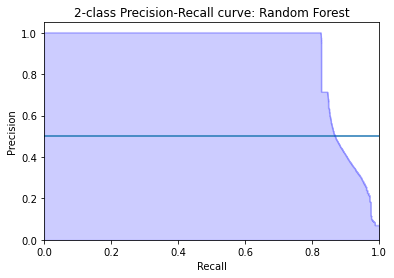

In [43]:
from sklearn.metrics import precision_recall_curve
from funcsigs import signature

precision, recall, thres = precision_recall_curve(y_valid, forest_pred_probs)
    
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.hlines(y=0.5, xmin=0, xmax=1)
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: Random Forest');

In [50]:
tau = 0
precision_score(y_valid,forest_pred_probs > tau), \
recall_score(y_valid,forest_pred_probs > tau)

(0.08405450384855419, 0.9879778303040183)

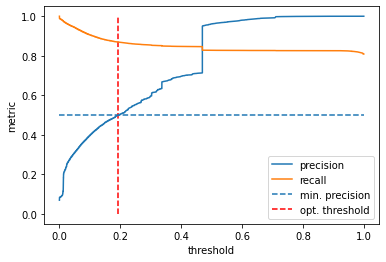

In [51]:
plt.plot(thres, precision[:-1], label='precision')
plt.plot(thres, recall[:-1], label='recall');
plt.hlines(y=0.5, xmin=0, xmax=1, label='min. precision', linestyles='dashed')
plt.vlines(x=0.194, ymin=0, ymax=1, color='red', label='opt. threshold', linestyles='dashed')
plt.legend();
plt.xlabel('threshold')
plt.ylabel('metric');

In [52]:
precision_score(y_valid,forest_pred_probs > 0.194), \
recall_score(y_valid,forest_pred_probs > 0.194)

(0.5011045309268659, 0.8689787268726058)

In [53]:
precision_score(y_valid,X_valid['sum_payments8'] > 0), \
recall_score(y_valid,X_valid['sum_payments8'] > 0)

(1.0, 0.825984187790366)

(array([2.97087e+05, 1.38980e+04, 7.23300e+03, 5.28700e+03, 8.71500e+03,
        4.24000e+02, 2.48000e+02, 1.80000e+02, 1.20000e+01, 2.02650e+04]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

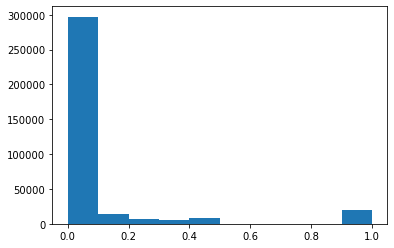

In [54]:
plt.hist(forest_pred_probs)

In [55]:
# feature importance

In [59]:
pd.DataFrame(forest.feature_importances_ , index=X_train.columns ,columns=['importance']).sort_values(by='importance',
                                                                                                     ascending=False)

,importance
num_payments8,0.121069
sum_payments8,0.116459
sum_payments7,0.073057
num_payments7,0.072743
num_payments6,0.062400
sum_payments6,0.043248
launches8,0.040391
sessions8,0.040025
sum_payments5,0.037349
num_payments5,0.033809


In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
def plot_confusion_matrix(actual, predicted, classes,
                          normalize=False,
                          title='Confusion matrix', figsize=(7,7),
                          cmap=plt.cm.Blues, path_to_save_fig=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(actual, predicted).T
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    
    if path_to_save_fig:
        plt.savefig(path_to_save_fig, dpi=300, bbox_inches='tight')

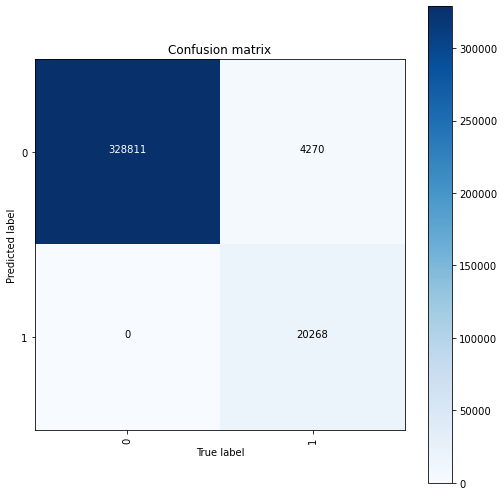

In [64]:
plot_confusion_matrix(actual=y_valid, predicted = X_valid['sum_payments8'] > 0,
                     classes=forest.classes_)

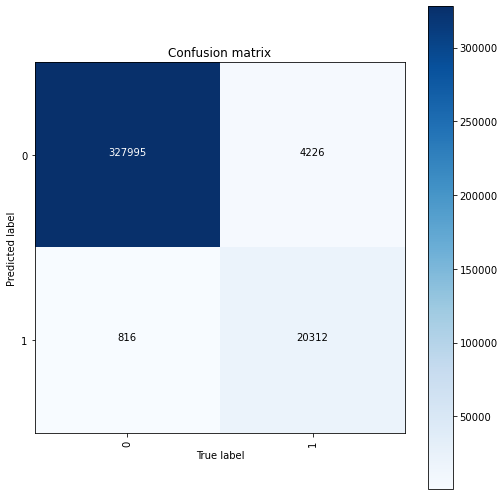

In [65]:
plot_confusion_matrix(actual=y_valid, predicted = forest_pred_probs > 0.5,
                     classes=forest.classes_)

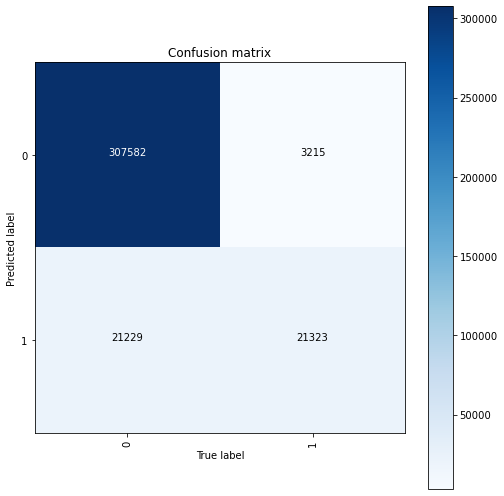

In [66]:
plot_confusion_matrix(actual=y_valid, predicted = forest_pred_probs > 0.194,
                     classes=forest.classes_)

In [68]:
## Logistic Regression

In [67]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

In [72]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [73]:
logit = LogisticRegression(n_jobs=4, random_state=17,class_weight='balanced',solver='sag')

In [74]:
%%time
logit.fit(X_train_scaled, y_train)

Wall time: 1min 2s


C:\Users\Access\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(class_weight='balanced', n_jobs=4, random_state=17,
                   solver='sag')

In [86]:
logit_pred_probs = logit.predict_proba(X_valid_scaled)[:, 1]

In [87]:
logit_pred_probs

array([0.08203672, 0.13398347, 0.0830235 , ..., 0.0830235 , 0.30489821,
       0.0830235 ])

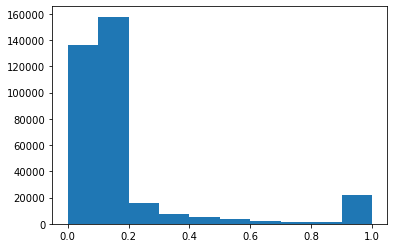

In [90]:
plt.hist(logit_pred_probs);

In [91]:
roc_auc_score(y_valid, logit_pred_probs)

0.9764940094392004

In [92]:
accuracy_score(y_valid, X_valid['sum_payments8'] > 0)

0.9879156301560214

In [93]:
accuracy_score(y_valid, logit_pred_probs > 0.5)

0.9642449815904389

In [94]:
pred_df = pd.DataFrame({'true': y_valid, 'pred_logit': logit_pred_probs, 
             'pred_baseline': (X_valid['sum_payments8'] > 0).astype('int')})

In [95]:
pred_df.sort_values(by='pred_logit', ascending=False, inplace=True)
pred_df.head()

,true,pred_logit,pred_baseline
62466,1,1.0,1
10587,1,1.0,1
32466,1,1.0,1
52663,1,1.0,1
52996,1,1.0,1


In [96]:
pred_df.iloc[:50000]['true'].mean() / y_valid.mean()

6.4604489102616345

In [97]:
pred_df.sort_values(by='pred_baseline', 
                    ascending=False).iloc[:50000]['true'].mean() / y_valid.mean()

5.840669753036107

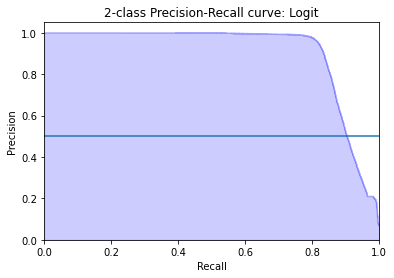

In [98]:
precision, recall, thres = precision_recall_curve(y_valid, logit_pred_probs)
    
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.hlines(y=0.5, xmin=0, xmax=1)
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: Logit');

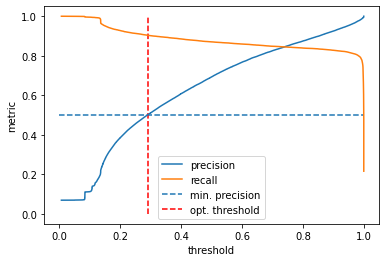

In [99]:
plt.plot(thres, precision[:-1], label='precision')
plt.plot(thres, recall[:-1], label='recall');
plt.hlines(y=0.5, xmin=0, xmax=1, label='min. precision', linestyles='dashed')
plt.vlines(x=0.29, ymin=0, ymax=1, color='red', label='opt. threshold', linestyles='dashed')
plt.legend();
plt.xlabel('threshold')
plt.ylabel('metric');

In [100]:
precision_score(y_valid, logit_pred_probs > 0.29), \
    recall_score(y_valid, logit_pred_probs > 0.29)

(0.5012316662523447, 0.9038633955497596)

In [101]:
precision_score(y_valid, X_valid['sum_payments8'] > 0),\
recall_score(y_valid, X_valid['sum_payments8'] > 0),

(1.0, 0.825984187790366)

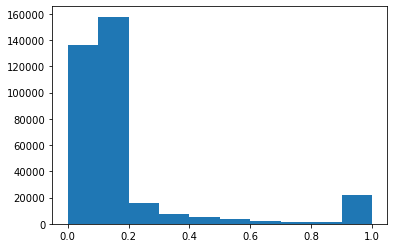

In [102]:
plt.hist(logit_pred_probs);

In [103]:
logit.coef_

array([[ 1.44535427,  0.95110193,  0.76704834,  0.63170105,  0.41422089,
         0.2356445 ,  0.45486177,  1.60579952, -1.44298959, -1.0331285 ,
        -0.83896913, -0.75986696, -0.83369335, -0.90983766, -0.60743031,
         0.61919593,  0.73417284,  0.97506944,  1.1213277 ,  1.29049777,
         1.47114655,  1.75726415,  2.24739711,  3.41536051,  0.16077928,
         0.18582807,  0.20089323,  0.21857347,  0.23966277,  0.27491391,
         0.33523726,  0.50292077]])

In [105]:
pd.DataFrame(logit.coef_.reshape(-1, 1), index=X_train.columns,
             columns=['coef']).sort_values(by='coef',
                                                ascending=False)

,coef
num_payments8,3.415361
num_payments7,2.247397
num_payments6,1.757264
sessions8,1.605800
num_payments5,1.471147
sessions1,1.445354
num_payments4,1.290498
num_payments3,1.121328
num_payments2,0.975069
sessions2,0.951102


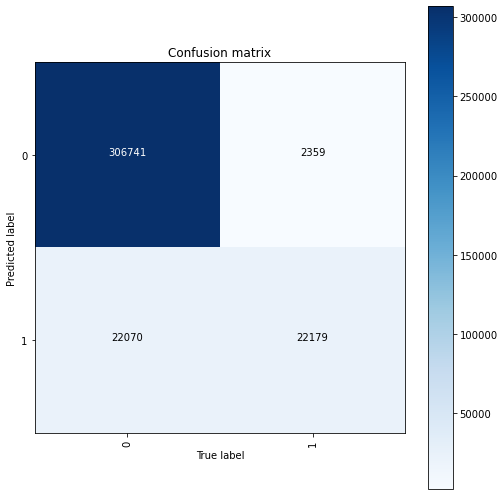

In [106]:
plot_confusion_matrix(actual=y_valid, predicted=(logit_pred_probs > 0.29),
                     classes=logit.classes_)